# **Go-To-Market Strategy Analysis On Cab Company Investment**
---

## Project Description:


#### XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.


## Data Set:

#### You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

* Cab_Data.csv – this file includes details of transaction for 2 cab companies

* Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

* Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

* City.csv – this file contains list of US cities, their population and number of cab users




## Step 1. Data import, clean and analyze datasets

In [239]:
# Import all libraries and dependencies
import os
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import datetime
import holoviews as hv
import hvplot.pandas
import xlrd
import matplotlib.pyplot as plt

### Imort and clean Cab Data

In [240]:
# Upload datasets into notebook, then store in a Pandas DataFrame
#read the file
cab_df = pd.read_csv(Path('DataSets/Cab_Data.csv'))

#print the head
display(cab_df.head())
print('Data shape: ',cab_df.shape)

# If use google colab 
# from google.colab import files
# uploaded = files.upload()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


Data shape:  (359392, 7)


In [241]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [242]:
# Convert exel date to datetime format
def convert_date(xl_date):
    return xlrd.xldate.xldate_as_datetime(xl_date, 0)
cab_df['Date of Travel'] = pd.to_datetime(cab_df['Date of Travel'].apply(convert_date), format='%Y-%m-%d')
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [243]:
# Check duplicates
cab_df.duplicated().sum()

0

`There's no need to check null values, since dataframe shape shows that the cab_df has 359392 rows and the info table above shows all 7 culumns give 359392 non-null values.`

In [244]:
# Summarize view of columns with numirical information
cab_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [245]:
# Check unique values
display(cab_df['Company'].unique())
display(cab_df['City'].unique())

array(['Pink Cab', 'Yellow Cab'], dtype=object)

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [246]:
# City counts
cab_df['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

### Imort and clean City Data

In [247]:
# Upload datasets into notebook, then store in a Pandas DataFrame
#read the file
city_df = pd.read_csv(Path('DataSets/City.csv'))

#print the head
display(city_df.head())
print('Data shape: ',city_df.shape)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


Data shape:  (20, 3)


> <b> Please notice: San Francisco is in the City Data dataframe but there's no San Francisco data in the Cab dataframe </b>

In [248]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [249]:
# Check duplicates
city_df.duplicated().sum()

0

`There's no need to check null values, since dataframe shape shows that the city_df has 20 rows and the info table above shows all 3 culumns give 20 non-null values.`

In [250]:
# Summarized view of city dataframe
city_df.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [251]:
# Change data types for Population and Users columns to int
city_df['Population'] = [x.replace(',','') for x in city_df['Population']]
city_df['Population'] = city_df['Population'].astype(int)

city_df['Users'] = [x.replace(',','') for x in city_df['Users']]
city_df['Users'] = city_df['Users'].astype(int)

city_df.dtypes

City          object
Population     int64
Users          int64
dtype: object

In [252]:
# Summarize view of columns with numirical information
city_df.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


### Imort and clean Customer ID Data

In [253]:
# Upload datasets into notebook, then store in a Pandas DataFrame
#read the file
customer_id_df = pd.read_csv(Path('DataSets/Customer_ID.csv'))

#print the head
display(customer_id_df.head())
print('Data shape: ',customer_id_df.shape)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


Data shape:  (49171, 4)


In [254]:
customer_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [255]:
# Check duplicates
customer_id_df.duplicated().sum()

0

`There's no need to check null values, since dataframe shape shows that the customer_id_df has 49171 rows and the info table above shows all 4 culumns give 49171 non-null values.`

In [256]:
# Summarized view of numirical columns in customer ID dataframe
customer_id_df[['Age','Income (USD/Month)']].describe()

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


In [257]:
# Customer gender counts
customer_id_df['Gender'].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

### Imort and clean Transaction ID Data

In [258]:
# Upload datasets into notebook, then store in a Pandas DataFrame
#read the file
tran_id_df = pd.read_csv(Path('DataSets/Transaction_ID.csv'))

#print the head
display(tran_id_df.head())
print('Data shape: ',tran_id_df.shape)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


Data shape:  (440098, 3)


In [259]:
tran_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [260]:
# Check duplicates
tran_id_df.duplicated().sum()

0

`There's no need to check null values, since dataframe shape shows that the customer_id_df has 440098 rows and the info table above shows all 3 culumns give 440098 non-null values.`

In [261]:
# Summarized view of Payment type in Transaction ID dataframe
tran_id_df['Payment_Mode'].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

### Imort coordinates data

In [262]:
# Upload datasets into notebook, then store in a Pandas DataFrame
#read the file
geo_df = pd.read_csv(Path('DataSets/geo.csv'))
geo_df = geo_df.drop(columns = ['Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'])
#print the head
display(geo_df.head())
print('Data shape: ',geo_df.shape)

,City,Lat,Lon
0,NEW YORK NY,40.6943,-73.9249
1,CHICAGO IL,41.8375,-87.6866
2,LOS ANGELES CA,34.1141,-118.4068
3,MIAMI FL,25.7840,-80.2101
4,SILICON VALLEY,37.3875,-122.0575


Data shape:  (20, 3)


### Merge data

In [263]:
# Print culumns of each data frame
print(cab_df.columns)
print(city_df.columns)
print(customer_id_df.columns)
print(tran_id_df.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')
Index(['City', 'Population', 'Users'], dtype='object')
Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')
Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')


In [293]:
# Merge dataframes
df= cab_df.merge(tran_id_df, on= 'Transaction ID').merge(customer_id_df, on ='Customer ID').merge(city_df, on = 'City')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


In [294]:
# Adding profit margin column
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

In [295]:
# Categorize the year, month, and day of the week of travel

year = []
month = []

for i in range(len(df['Date of Travel'])):
    year.append(df['Date of Travel'][i].year)
    month.append(df['Date of Travel'][i].month)
    day.append(df['Date of Travel'][i].day)
df['Year'] = year
df['Month'] = month
df['Day of Week'] = df['Date of Travel'].dt.day_name()

for index, row in df.iterrows():
    if row['Day of Week'] == 'Monday':
        df.at[index,'Day'] = '1'
    elif row['Day of Week'] == 'Tuesday':
        df.at[index,'Day'] = '2'
    elif row['Day of Week'] == 'Wednesday':
        df.at[index,'Day'] = '3'
    elif row['Day of Week'] == 'Thursday':
        df.at[index,'Day'] = '4'
    elif row['Day of Week'] == 'Friday':
        df.at[index,'Day'] = '5'
    elif row['Day of Week'] == 'Saturday':
        df.at[index,'Day'] = '6'
    elif row['Day of Week'] == 'Sunday':
        df.at[index,'Day'] = '7'

df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Profit,Year,Month,Day of Week,Day
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150,2016,1,Friday,5
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772,2018,7,Saturday,6
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480,2018,11,Friday,5
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660,2016,1,Wednesday,3
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808,2018,4,Saturday,6


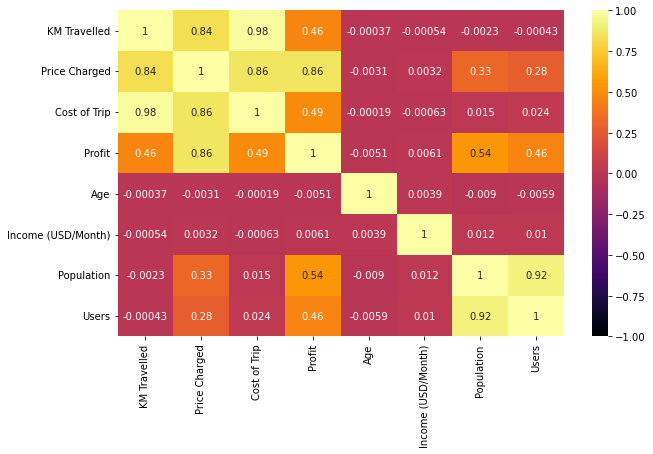

In [296]:
# Find correlations of each aspects
corr_df = df[['KM Travelled','Price Charged', 'Cost of Trip', 'Profit', 'Age','Income (USD/Month)', 'Population','Users']].corr()
# Use Seaborn heatmap to visualize the correlation
plt.subplots(figsize=(10,6))
sns.heatmap(corr_df, vmin = -1, vmax=1, cmap='inferno', annot=True)
plt.show()

> <b> We can see from the above image that KM Travelled, Price Charged, Cost of Trip, Population, and Users have positive correlation with each other </b>

## Step 2. Data investigation and visualization

### Hypotheses: Yellow VS. Pink

> How many rides were taken by customers in each company?

> Which city cost more for each company for every KM travelled? 
(Ave cost per KM by company by city)

> Which company in which city has the highest profit margin?

> Dominate cities by company



In [297]:
# Total rides from 2016-2018
df['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

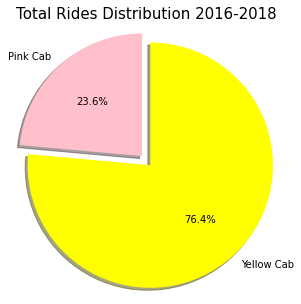

In [298]:
# Using pie chart graph the ride distribution between the two companies
labels = 'Pink Cab', 'Yellow Cab'
sizes = [84711, 274681]
colors = ['pink', 'yellow']
explode = (0,0.1)
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors = colors)
ax1.axis('equal')

plt.title('Total Rides Distribution 2016-2018', fontsize = 15)
plt.show()

> <b> During the analyzing period, more than 4 times of the rides were taken in `Yellow cab` than in Pink cab.</b>

In [299]:
# Create a new dataframe group all data by city and by company and find average values of each category
df_by_ct_co_avg = df.groupby(['City','Company']).mean()
# Create a new column containing cost per km information
df_by_ct_co_avg['Cost per KM'] = df_by_ct_co_avg['Cost of Trip']/df_by_ct_co_avg['KM Travelled']
df_by_ct_co_avg.head()

Transaction ID  KM Travelled  Price Charged  \
City       Company                                                   
ATLANTA GA Pink Cab      1.021965e+07     22.539824     302.131555   
           Yellow Cab    1.022087e+07     22.248247     422.413446   
AUSTIN TX  Pink Cab      1.023399e+07     21.969176     320.435070   
           Yellow Cab    1.022852e+07     22.512840     422.248940   
BOSTON MA  Pink Cab      1.022321e+07     22.740746     300.551489   

                       Cost of Trip   Customer ID        Age  \
City       Company                                             
ATLANTA GA Pink Cab      247.619594  28504.842225  35.321793   
           Yellow Cab    293.615723  28489.815531  35.306816   
AUSTIN TX  Pink Cab      241.502901  34513.518737  35.672377   
           Yellow Cab    296.999358  34522.128798  35.129458   
BOSTON MA  Pink Cab      250.030529  58514.572889  35.183571   

                       Income (USD/Month)  Population    Users      Profit  \
City       Company                                                           
ATLANTA GA Pink Cab          15033.438706    814885.0  24701.0   54.511961   
           Yellow Cab        14902.657981    814885.0  24701.0  128.797723   
AUSTIN TX  Pink Cab          14863.617773    698371.0  14978.0   78.932168   
           Yellow Cab        14593.396631    698371.0  14978.0  125.249582   
BOSTON MA  Pink Cab          15383.779213    248968.0  80021.0   50.520960   

                              Year     Month  Cost per KM  
City       Company                                         
ATLANTA GA Pink Cab    2017.046538  7.528944    10.985871  
           Yellow Cab  2017.050043  7.483693    13.197252  
AUSTIN TX  Pink Cab    2017.058351  8.579229    10.992807  
           Yellow Cab  2017.036988  8.232166    13.192443  
BOSTON MA  Pink Cab    2017.047243  7.766101    10.994825

In [300]:
# Create a new dataframe group all data by city and by company and find total values of each category
df_by_ct_co_sum = df.groupby(['City','Company']).sum()
df_by_ct_co_sum.head()

Transaction ID  KM Travelled  Price Charged  \
City       Company                                                   
ATLANTA GA Pink Cab       18007031833      39715.17      532355.80   
           Yellow Cab     59229968168     128928.59     2447885.92   
AUSTIN TX  Pink Cab       19117094048      41038.42      598572.71   
           Yellow Cab     30971960840      68168.88     1278569.79   
BOSTON MA  Pink Cab       53017566077     117933.51     1558660.02   

                       Cost of Trip  Customer ID     Age  Income (USD/Month)  \
City       Company                                                             
ATLANTA GA Pink Cab    4.363057e+05     50225532   62237            26488919   
           Yellow Cab  1.701503e+06    165098481  204603            86360903   
AUSTIN TX  Pink Cab    4.511274e+05     64471253   66636            27765238   
           Yellow Cab  8.993141e+05    104533006  106372            44188805   
BOSTON MA  Pink Cab    1.296658e+06    303456575  182462            79780279   

                       Population      Users       Profit      Year  Month  
City       Company                                                          
ATLANTA GA Pink Cab    1435827370   43523162   96050.0760   3554036  13266  
           Yellow Cab  4722258575  143142295  746382.8056  11688805  43368  
AUSTIN TX  Pink Cab    1304557028   27978904  147445.2900   3767865  16026  
           Yellow Cab  2114667388   45353384  379255.7352   6107588  24927  
BOSTON MA  Pink Cab    1291148048  414988906  262001.6980  10460407  40275

In [301]:
# Compare how many KM travelled for each company and in which city traveled more
p = hv.render(df_by_ct_co_sum[['KM Travelled']].hvplot.bar( title = 'Total KM Traveled in Each City', width = 800, height = 700, color = ['pink', 'yellow']).opts(xrotation = 90,yformatter='%.0f'))
p.xaxis.group_label_orientation = 'vertical'
from bokeh.plotting import show
show(p)

> <b> `Yellow` cabs outrun Pink cabs by a huge amount especially in New York, Boston, Chicago, and DC </b>

> <b> `Pink` cabs has more advantage on the west coast cities such as Los Angeles, San Diego, Silicon Valley while `Yellow` cabs dominate the east coast </b>

> <b> We can't directly see how many Yellow or Pink cabs are running in each city, but it is obvious that there are way more `Yellow` cabs than Pink cabs in most of the cities </b>

> <b> There are high demands for cabs in Boston, Chicago, Los Angeles, New York, and DC; and moderate demands for San Diego, Seattle, Silicon Valley, and Atlanta </b>

> <b> Still need to find out demand for cabs over the years in later part of the analysis </b>

In [302]:
# Compare how much does it cost per KM travelled for each company and which city cost more or less
p1 = hv.render(df_by_ct_co_avg[['Cost per KM']].hvplot.bar( title = 'Average Cost Per KM', width = 900, height = 400, color = ['pink', 'yellow']).opts(xrotation = 90))
p1.xaxis.group_label_orientation = 'vertical'
from bokeh.plotting import show
show(p1)

> <b> The bar chart above shows it generally cost `$2` more every trip in all cities for `Yellow` cab than Pink cab </b>

> <b> As we found out earlier that there are way more Yellow cabs than Pink cabs, which means it `cost way more` to drive and ride a `Yellow` cab, as well as to run its' company </b>

> <b> The average cost per KM in all cities are generally the same </b>

In [305]:
p2 = hv.render(df_by_ct_co_avg['Profit'].hvplot(kind = 'bar', title = 'Average Profit Margin', stacked= True, legend = 'top_left', width = 600, height = 400, color = ['pink', 'yellow']).opts(xrotation = 90))
p2.xaxis.group_label_orientation = 'vertical'
show(p2)

> <b> If the average cost per KM is generally the same among all cities provided (Previous section), the the higher the average profit margin means customers were charged higher </b>

> <b> With a slightly lower average cost per KM, `Pink` cab shows low profit margin, they are charging customers way lower than Yellow cabs </b>

> <b> Generally, `Pink` cab has lots of rooms for profit margin in all cities, but especially in Dallas, Denver, New York, Phoenix, Pittsburgh, and Silicon Valley </b>

In [306]:
# Create a new dataframe and display total transactions over the years by each company and merge with cordinates of each city
join = pd.merge(geo_df, df, how ='inner', on = ['City'])
group = join.groupby(['City','Company', 'Lat','Lon']).size()
group_df = pd.DataFrame(group, columns = ['Number of Transactions'])
group_df.head()

Number of Transactions
City       Company    Lat     Lon                             
ATLANTA GA Pink Cab   33.7628 -84.4220                    1762
           Yellow Cab 33.7628 -84.4220                    5795
AUSTIN TX  Pink Cab   30.3005 -97.7522                    1868
           Yellow Cab 30.3005 -97.7522                    3028
BOSTON MA  Pink Cab   42.3188 -71.0852                    5186

In [307]:
# Create 2 new dataframe and each contains city and transaction information for each company
pink = pd.DataFrame()
yellow = pd.DataFrame()
for i in range(len(group_df)):
    if i %2 == 0:
        pink = pink.append(group_df.iloc[[i]])
    elif i %2 == 1:
        yellow = yellow.append(group_df.iloc[[i]])

In [308]:
# Change the name of the column for yellow cab transaction data
yellow.rename(columns = {'Number of Transactions':'Yellow Tran'}, inplace = True)
yellow.head()

,,,,Yellow Tran
City,Company,Lat,Lon,
ATLANTA GA,Yellow Cab,33.7628,-84.4220,5795
AUSTIN TX,Yellow Cab,30.3005,-97.7522,3028
BOSTON MA,Yellow Cab,42.3188,-71.0852,24506
CHICAGO IL,Yellow Cab,41.8375,-87.6866,47264
DALLAS TX,Yellow Cab,32.7935,-96.7667,5637


In [309]:
# Change the name of the column for pink cab transaction data
pink.rename(columns = {'Number of Transactions':'Pink Tran'}, inplace = True)
pink.head()

,,,,Pink Tran
City,Company,Lat,Lon,
ATLANTA GA,Pink Cab,33.7628,-84.4220,1762
AUSTIN TX,Pink Cab,30.3005,-97.7522,1868
BOSTON MA,Pink Cab,42.3188,-71.0852,5186
CHICAGO IL,Pink Cab,41.8375,-87.6866,9361
DALLAS TX,Pink Cab,32.7935,-96.7667,1380


In [310]:
# Concat both pink and yellow dataframe
trans = pd.merge(pink, yellow, how ='outer', on = ['City', 'Lat', 'Lon'])
trans.head()

,,,Pink Tran,Yellow Tran
City,Lat,Lon,,
ATLANTA GA,33.7628,-84.4220,1762,5795
AUSTIN TX,30.3005,-97.7522,1868,3028
BOSTON MA,42.3188,-71.0852,5186,24506
CHICAGO IL,41.8375,-87.6866,9361,47264
DALLAS TX,32.7935,-96.7667,1380,5637


In [311]:
# Create a points plot for total pink cab rides using geoviews
pink.hvplot.points(
    'Lon',
    'Lat',
    geo=True,
    size='Pink Tran',
    tiles='OSM',
    color='pink',
    alpha=0.5,
    frame_width = 700,
    frame_height = 500,
    title='Total Pink Cab Rides 2016-2018',
    xlabel='Longitude',
    ylabel='Latitude'
)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (Pink Tran)

> <b> Compare this image and the image below for differences between `Pink` and `Yellow` cabs total rides (2016 to 2018) from a geographical perspective </b>


In [312]:
# Create a points plot for total yellow cab rides using geoviews
yellow.hvplot.points(
    'Lon',
    'Lat',
    geo=True,
    size='Yellow Tran',
    tiles='OSM',
    color='yellow',
    alpha=0.5,
    frame_width = 700,
    frame_height = 500,
    title='Total Yellow Cab Rides 2016-2018',
    xlabel='Longitude',
    ylabel='Latitude'
)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lon,Lat]   (Yellow Tran)

> <b> `Yellow` cabs outrun Pink cabs by a huge amount especially in east coast cities such as, New York, Boston, Chicago, and DC </b>

> <b> `Pink` cabs has more advantage on the west coast cities such as Los Angeles, San Diego, Silicon Valley while `Yellow` cabs dominate the east coast </b>

> <b> We can't directly see how many Yellow or Pink cabs are running in each city, but it is obvious that there are way more `Yellow` cabs than Pink cabs in most of the cities </b>

> <b> There are high demands for cabs in Boston, Chicago, Los Angeles, New York, and DC; and moderate demands for San Diego, Seattle, Silicon Valley, and Atlanta than some of the midwest cities </b>

### Hypotheses: Users

> Does age group in each gender and each company matter?

> Does gender matter for each company?

> Are there differences between Age group in each city?

> Is travel distance influenced by Age?

> Relationship of age and income

> Dominate income group in genders by company

In [313]:
# Age distribution in genders for each company
df.hvplot.violin(
    y= 'Age',
    by = ['Company','Gender'],
    color = 'Company',
    cmap = ['pink','yellow'],
    legend=False,
    width = 600,
    height = 500
)

:Violin   [Company,Gender]   (Age)

> <b> Both companies dominate user age group is `20-40` years old </b>

> <b> Gender distribution for both companies are quite `similar` </b>

> <b> Gender distribution within each company are `generally even` between Female and Male users </b>

> <b> The `average user age` for both companies and both genders is about `33` years old </b>

In [314]:
# Calculate gender distribution in each company
gender = df.groupby(['Company','Gender'])
gender = gender['Customer ID'].nunique()
print(gender)

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


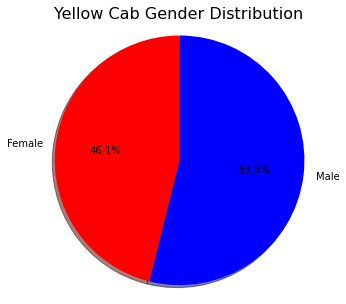

In [350]:
# Using pie chart graph the gender distribution for Yellow cab
labels = 'Female', 'Male'
sizes = gender['Yellow Cab']
colors = ['red', 'blue']
fig2, ax2 = plt.subplots(figsize=(5,5))
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors = colors)
ax2.axis('equal')
plt.title('Yellow Cab Gender Distribution', fontsize = 16)
plt.show()

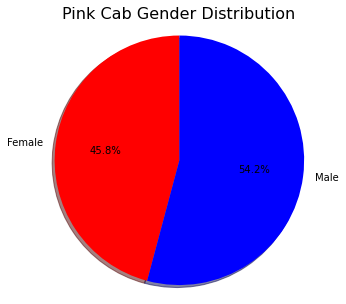

In [316]:
# Using pie chart graph the gender distribution for Pink cab
labels = 'Female', 'Male'
sizes = gender['Pink Cab']
colors = ['red', 'blue']
fig2, ax2 = plt.subplots(figsize=(5,5))
ax2.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors = colors)
ax2.axis('equal')
plt.title('Pink Cab Gender Distribution', fontsize = 16)
plt.show()

> <b> Color `Pink` is not an influencer in gender distribution for Pink Cab </b>

> <b> Both companies has more male than female customers </b>

In [317]:
# Age distribution by gender in each city
p3 = hv.render(df.hvplot.box(
    y= 'Age',
    by = ['City','Gender'],
    color = 'Gender',
    cmap = ['blue','red'],
    title = 'Age Distribution by Gender in Cities',
    legend=False,
    width = 1200,
    height = 500
).opts(xrotation = 90,
      fontsize = {'title': 15}))
p3.xaxis.group_label_orientation = 'vertical'
show(p3)

> <b> Age distributions by gender are quite even in each city. There is no big age difference between higher and lower cab demand cities </b>

> <b> `Pink` cabs has wider female customer age ranges than males in cities such as Los Angeles, San Diego, Silicon Valley Nashville, Pittsburgh, Seattle where `Pink Cab` performs better than other cities </b>

In [318]:
# Create a new dataframe that put customers into 3 age groups
age_avg = df.groupby('Age').mean()
age_avg.reset_index(inplace = True)

for index, row in age_avg.iterrows():
    if row['Age'] <= 25:
        age_avg.at[index,'Age Group'] = '18-25'
    elif row['Age'] > 25 and row['Age'] <= 42:
        age_avg.at[index,'Age Group'] = '26-42'
    elif row['Age'] > 42:
        age_avg.at[index,'Age Group'] = '42-65'
age_avg.head()

,Age,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Income (USD/Month),Population,Users,Profit,Year,Month,Age Group
0,18,1.022058e+07,22.525875,424.430050,285.160957,18883.022497,14464.733542,3.142014e+06,156227.433800,139.269093,2017.043426,7.498433,18-25
1,19,1.022047e+07,22.503793,411.643812,285.000588,18769.266759,15054.463636,2.834895e+06,152169.004745,126.643224,2017.047106,7.463204,18-25
2,20,1.022026e+07,22.612842,430.329782,286.978253,18588.187914,15525.407229,3.310613e+06,163374.374192,143.351528,2017.040886,7.509036,18-25
3,21,1.022218e+07,22.619864,427.149974,287.347278,18499.695127,14727.257020,3.349033e+06,164285.416062,139.802696,2017.053189,7.526638,18-25
4,22,1.022083e+07,22.687810,425.835531,287.867088,18782.857494,15204.666328,3.206016e+06,160372.701933,137.968442,2017.046626,7.473550,18-25


In [319]:
# KM Travelled distribution by Age
age_avg.hvplot.box(
    y = 'KM Travelled',
    by = ['Age Group'],
    title = 'Average Travel Distance Distribution by Age Group',
    legend=False,
    width =  600,
    height = 400
).opts(fontsize = {'title': 15})

:BoxWhisker   [Age Group]   (KM Travelled)

> <b> As age increases, cab travel distance generally increases, so does the variation of travel distance </b>

> <b> Customers from younger age groups generally travel within 23 KMs while customers from 42-65 age group have higher needs taking cabs to closer destinations </b>

In [320]:
# Income distribution by Age
age_avg.hvplot.box(
    y = 'Income (USD/Month)',
    by = ['Age Group'],
    title = 'Average Income Distribution by Age Group',
    legend=False,
    width =  600,
    height = 400
).opts(fontsize = {'title': 15})

:BoxWhisker   [Age Group]   (Income (USD/Month))

> <b> As age increases, income generally increases, so does the income variation </b>

> <b> Customers from younger age groups have incomes between 14500 and 15700, while customers from 42-65 age group have income as high as 16300 and as low as 14400 </b>

In [321]:
# Income distribution in genders for each company
df.hvplot.violin(
    y= 'Income (USD/Month)',
    by = ['Company','Gender'],
    color = 'Company',
    cmap = ['pink','yellow'],
    title = 'User Income Distribution by Gender by Company',
    legend=False,
    width = 600,
    height = 500
)

:Violin   [Company,Gender]   (Income (USD/Month))

> <b> Both companies have similar income distributions in each gender groups </b>

> <b> The majority of customers' income fall under 3000 - 24000 </b>

> <b> Income in both companies and gender groups are heavily weighted below it's mean </b>

### Cities

> Users out of population by city

> Income by city


In [322]:
# Create a new dataframe contains City, Users, and Population information
user_vs_popu = df.groupby(['City']).mean()
user_vs_popu = user_vs_popu.iloc[:,7:9]
user_vs_popu = user_vs_popu.reindex(columns= ['Users', 'Population'])
user_vs_popu['U/P'] = (user_vs_popu['Users'] / user_vs_popu['Population']) * 100
user_vs_popu

,Users,Population,U/P
City,,,
ATLANTA GA,24701.0,814885.0,3.031225
AUSTIN TX,14978.0,698371.0,2.144705
BOSTON MA,80021.0,248968.0,32.141078
CHICAGO IL,164468.0,1955130.0,8.412126
DALLAS TX,22157.0,942908.0,2.349858
DENVER CO,12421.0,754233.0,1.646839
LOS ANGELES CA,144132.0,1595037.0,9.036279
MIAMI FL,17675.0,1339155.0,1.319862
NASHVILLE TN,9270.0,327225.0,2.832913


In [323]:
# Stack Users and Population data by City in a bar chart
user_vs_popu.drop(columns = 'U/P').hvplot(kind = 'bar',title = 'User VS Population', stacked= True, legend = 'top_left', width = 900, height = 600, alpha=0.6).opts(xrotation = 90,yformatter='%.0f')

:Bars   [City,Variable]   (value)

In [324]:
user_vs_popu['U/P'].hvplot(kind = 'bar',title = 'User Respective Population', stacked= True, ylabel = 'Percentage (%)', width = 900, height = 600, alpha=0.6).opts(xrotation = 90,yformatter='%.0f')

:Bars   [City]   (U/P)

> <b> Cab users only make up a minimal portion of the total population in each city </b>

> <b> Only (6 out of 19 cities) New York, Chicago, Los Angeles, DC, Boston, and San Diego have more obvious amount of users comparing to other cities </b>

> <b> Even though New York have more users, there are around 30% Boston and DC population use cab services </b>

In [325]:
# Create a new dataframe group all data by city and find average user income
avg_income = df.groupby(['City']).mean()
avg_income['Income (USD/Month)'].hvplot.bar().opts(xrotation = 90)

:Bars   [City]   (Income (USD/Month))

> <b> Regardless of demands, cab users' average income level are around 14000 in the list of cities </b>

### Hypotheses: Dates

> How were cab demands influenced over the years for both companies overall and in each city?

> Are there certain time of the year and month affects cab demands? (Seasonal effects year and month)

> Is cab demand affected by day of the week?

> How was profit margin affected by time?

In [326]:
# Create a new dataframe to display cab demands over the years for both companies
yr_demand = df.groupby(['Year','Company'])
yr_demand = yr_demand['Transaction ID'].size()
yr_demand_df = pd.DataFrame(yr_demand)

# Create a new dataframe to display cab demands over the years in each city for both companies
yr_demand_city = df.groupby(['Year','City','Company'])
yr_demand_city = yr_demand_city['Transaction ID'].size()
yr_demand_city_df = pd.DataFrame(yr_demand_city)

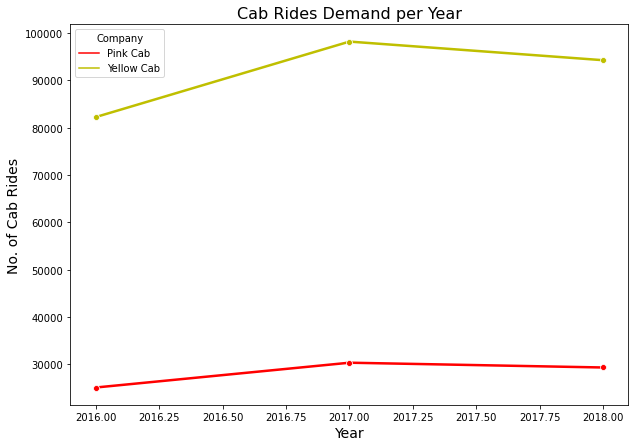

In [327]:
# Yearly demand by company
plt.figure(figsize = (10, 7))
sns.lineplot(x='Year', y='Transaction ID', hue="Company", data=yr_demand_df, marker='o', palette=['r', 'y'], linewidth=2.5)
plt.xlabel("Year", size=14)
plt.ylabel("No. of Cab Rides", size=14)
plt.title("Cab Rides Demand per Year", size = 16)
plt.show()

> <b> The overall demand for cab service increased for both companies from 2016 to 2017 followed by a down trend towards 2018 </b>

> <b> The demand for `Yellow` cab sservice increased higher than Pink cab; also it decreased faster than Pink cab </b>

> <b> `Pink` cab had a steady increase in demand from 2016 to 2017 and kept a stable demand record to 2018 </b>

In [328]:
# Yearly demand by company in each city
yr_demand_city_df.hvplot(
    title='Cab Rides Demand per Year',
    x='Year',
    y = 'Transaction ID',
    by = 'Company',
    xlabel='Year',
    ylabel='Number of Rides',
    groupby='City',
    line_color = ['pink','yellow'],
    line_width = 3
)

:DynamicMap   [City]
   :NdOverlay   [Company]
      :Curve   [Year]   (Transaction ID)

> <b> Overall, `Yellow` cab has higher demand and the demand for its service increased faster than Pink cab </b>

> <b> Demand for `Yellow` cab increased high in: Atlanta, Austin, Denver, Los Angeles, Miami, Orange County, Phoenix, Silicon Valley, Tucson; Demand decrease slow in: Denver, Chicago, DC</b>

> <b> Demand for `Pink` cab increased high in: Austin, Denver, Los Angeles, Orange County, Phoenix, Silicon Valley, Tucson; Stable demand in: Atlanta, Boston, Chicago, Dallas, Miami, New York, Seattle, DC</b>

> <b> Demand for `Pink` cab higher than Yellow cab: Nashville, Pittsburgh, Sacramento, San Diego </b>

In [329]:
# Create a new dataframe to display cab demands over the Months for both companies
mon_demand = df.groupby(['Month','Company'])
mon_demand = mon_demand['Transaction ID'].size()
mon_demand_df = pd.DataFrame(mon_demand)

# Create a new dataframe to display cab demands over the years in each city for both companies
mon_demand_city = df.groupby(['Month','City','Company'])
mon_demand_city = mon_demand_city['Transaction ID'].size()
mon_demand_city_df = pd.DataFrame(mon_demand_city)

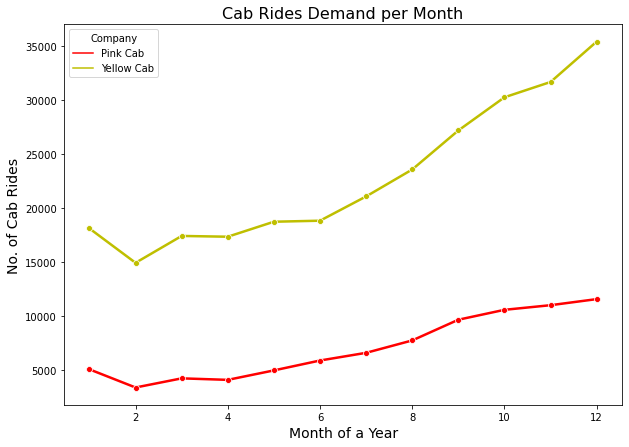

In [330]:
# Monthly demand trend by company
plt.figure(figsize = (10, 7))
sns.lineplot(x='Month', y='Transaction ID', hue="Company", data=mon_demand_df, marker='o', palette=['r', 'y'], linewidth=2.5)
plt.xlabel("Month of a Year", size=14)
plt.ylabel("No. of Cab Rides", size=14)
plt.title("Cab Rides Demand per Month", size = 16)
plt.show()

> <b> The overall demand trend for cab service increases faster through summer to winter and drops around spring </b>

> <b> The demand trend for `Yellow` cab service increased higher than Pink cab; also it decreased faster than Pink cab in spring</b>

> <b> `Pink` cab had a steady increase in demand from summer to winter and drops slightly during spring </b>

In [331]:
# Monthly demand by company in each city
mon_demand_city_df.hvplot(
    title='Cab Rides Demand Monthly Trend',
    x='Month',
    y = 'Transaction ID',
    by = 'Company',
    xlabel='Month of a Year',
    ylabel='Number of Rides',
    groupby='City',
    line_color = ['pink','yellow'],
    line_width = 3
)

:DynamicMap   [City]
   :NdOverlay   [Company]
      :Curve   [Month]   (Transaction ID)

> <b> Overall, `Yellow` cab has higher demand and the demand for its service increased faster than Pink cab throughout the year </b>

> <b> Demand for `Yellow` cab increased high in: Atlanta, Austin, Denver, Los Angeles, Miami, New York, Orange County, Phoenix, Silicon Valley, Tucson; Demand decrease slow in: Chicago, DC</b>

> <b> Demand for `Pink` cab increased high in: Austin, Denver, Los Angeles, Orange County, Phoenix, Silicon Valley, Tucson; Stable demand in: Atlanta, Boston, Chicago, Dallas, Miami, New York, DC</b>

> <b> Demand for `Pink` cab higher than Yellow cab: Nashville, Pittsburgh, Sacramento, San Diego </b>

> <b> Demand for `Pittsburgh` picks up in spring when it's still cold</b>

> <b> Demand for `San Diego` and `Tucson` peaks in Fall when it's still hot</b>

In [332]:
# Create a new dataframe to display cab demands over the week for both companies
day_demand = df.groupby(['Day','Company'])
day_demand = day_demand['Transaction ID'].size()
day_demand_df = pd.DataFrame(day_demand)

# Create a new dataframe to display cab demands over the week in each city for both companies
day_demand_city = df.groupby(['Day','City', 'Company'])
day_demand_city = day_demand_city['Transaction ID'].size()
day_demand_city_df = pd.DataFrame(day_demand_city)

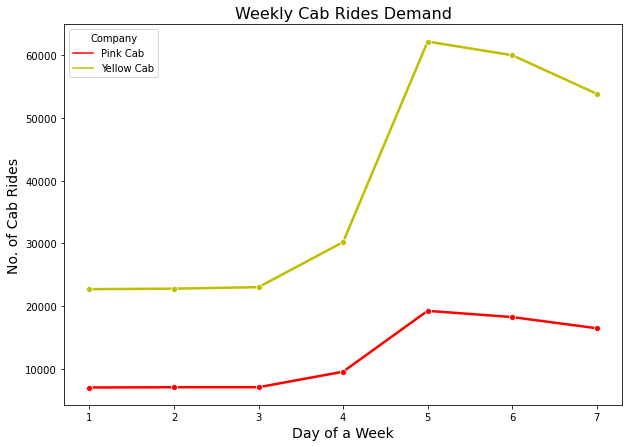

In [333]:
# Day of the week demand trend by company
plt.figure(figsize = (10, 7))
sns.lineplot(x='Day', y='Transaction ID', hue="Company", data=day_demand_df, marker='o', palette=['r', 'y'], linewidth=2.5)
plt.xlabel("Day of a Week", size=14)
plt.ylabel("No. of Cab Rides", size=14)
plt.title("Weekly Cab Rides Demand", size = 16)
plt.show()

> <b> The overall demand trend for cab service picks up during the weekend </b>

> <b> The demand trend for `Yellow` cab service increased higher than Pink cab; also it decreased faster than Pink cab on Sunday</b>

> <b> `Pink` cab had a steady increase in demand from Thursday and drops slightly on Sunday </b>

In [334]:
# Day of week demand by company in each city
day_demand_city_df.hvplot(
    title='Cab Rides Day of Week Trend',
    x='Day',
    y = 'Transaction ID',
    by = 'Company',
    xlabel='Day of a Week',
    ylabel='Number of Rides',
    groupby='City',
    line_color = ['pink','yellow'],
    line_width = 3
)

:DynamicMap   [City]
   :NdOverlay   [Company]
      :Curve   [Day]   (Transaction ID)

> <b> Overall, `Yellow` cab has higher demand and the demand for its service increased faster than Pink cab during the weekend </b>

> <b> Demand for `Yellow` cab increased high in: Atlanta, Austin, Boston, Chicago, Denver, Los Angeles, Miami, New York, Orange County, Phoenix, Silicon Valley, Tucson </b>

> <b> Demand for `Pink` cab increased high in: Austin, Denver, Los Angeles, Orange County, Phoenix, Sacramento, San diego, Silicon Valley, Tucson; Stable demand in: Atlanta, Boston, Chicago, Dallas, New York, DC</b>

> <b> Demand for `Pink` cab higher than Yellow cab: Nashville, Pittsburgh, Sacramento, San Diego </b>

> <b> Pink cab are the main supply in `Pittsburgh`, it seems that there are not enough pick cabs picks on Fridays </b>

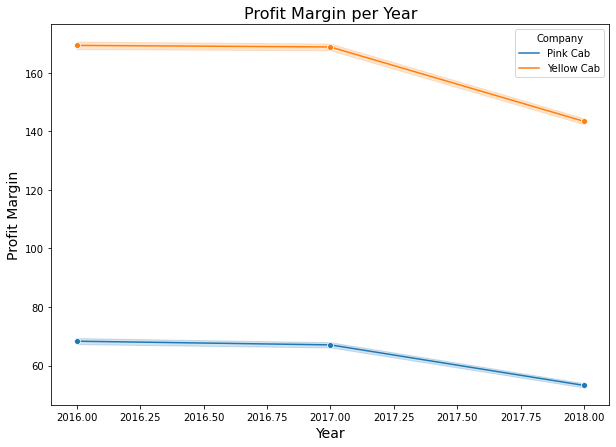

In [336]:
# Yearly profit margin
plt.figure(figsize = (10, 7))
sns.lineplot(x='Year', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit Margin", size=14)
plt.title("Profit Margin per Year", size = 16)
plt.show()

> <b> The overall profit for cab service decreases from 2017 to 2018 </b>

> <b> The profit margin for `Yellow` cab decreases faster than Pink cab; although its profit is still higher in general</b>

> <b> `Pink` cab had a steady decrease in profit margin </b>

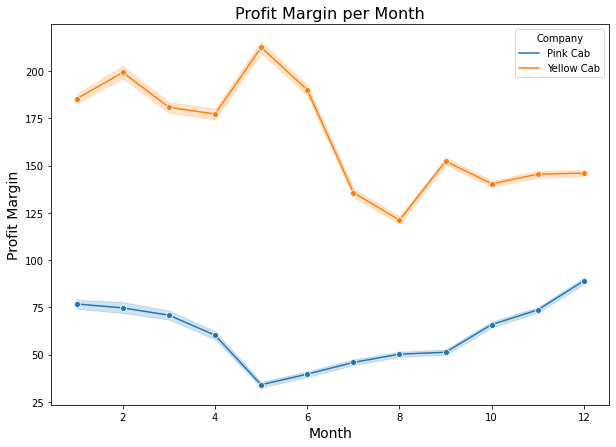

In [337]:
# Monthly profit margin
plt.figure(figsize = (10, 7))
sns.lineplot(x='Month', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Month", size=14)
plt.ylabel("Profit Margin", size=14)
plt.title("Profit Margin per Month", size = 16)
plt.show()

> <b> It seems customers takes cabs more often during winter times or when it's colder for both companies </b>

> <b> The profit margin for `Yellow` cab increases during winter and spring and reaches its highest profit margin in May, then drops during summer and reaches its lowest in August </b>

> <b> `Pink` cab had a steady increase in profit throughout Fall and Winter and drops slowly in Spring and reaches its lowest profit margin in May </b>

> <b> It seems that it cost `Pink` cabs' more to run during spring time </b>

> <b> It seems that `Yellow` cabs' dominate customer groups are in cities have long summers and it cost more to run during the summer which comply with analysis in previous sections </b>

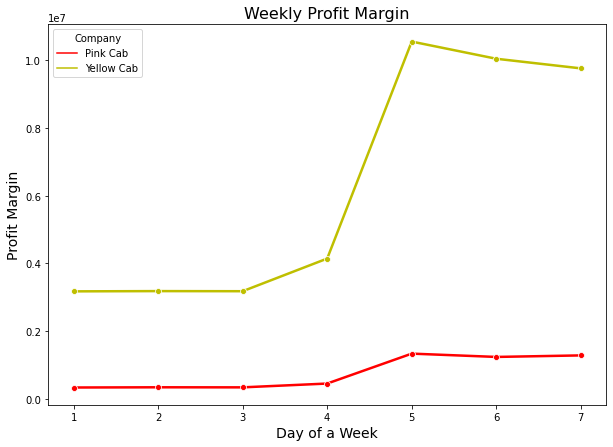

In [339]:
# Create a new dataframe to display profit margin over the week for both companies
day_profit = df.groupby(['Day','Company'])
day_profit = day_profit['Profit'].sum()
day_profit_df = pd.DataFrame(day_profit)

# Day of the week demand trend by company
plt.figure(figsize = (10, 7))
sns.lineplot(x='Day', y='Profit', hue="Company", data=day_profit_df, marker='o', palette=['r', 'y'], linewidth=2.5)
plt.xlabel("Day of a Week", size=14)
plt.ylabel("Profit Margin", size=14)
plt.title("Weekly Profit Margin", size = 16)
plt.show()

> <b> The overall demand trend for cab service picks up during the weekend </b>

> <b> The demand trend for `Yellow` cab service increased higher than Pink cab; it also decreased faster than Pink cab on Sunday</b>

> <b> `Pink` cab had a steady increase in demand from Thursday and drops slightly on Sunday </b>

## Step 3. Summarize and Recommendations

### Summary

*Data defect: There are 20 cities in the City dataframe while 19 in the Cab data. San Fransisco was not included in the Cab data.

Top 6 cab rides cities: 
* NEW YORK NY       99885
* CHICAGO IL        56625
* LOS ANGELES CA    48033
* WASHINGTON DC     43737
* BOSTON MA         29692
* SAN DIEGO CA      20488

During the analyzing period, more than 4 times of the rides were taken in `Yellow cab` than in Pink cab. Yellow cabs has way higher demands or outrun Pink cabs especially in New York, Boston, Chicago, and DC. `Pink` cabs has more advantage on the west coast cities such as Los Angeles, San Diego, Silicon Valley. 

The average cost per KM travelled to drive a Yellow cab is $2 higher than a Pink cab among all cities. As we found out earlier that there are way more Yellow cabs than Pink cabs, which means it `cost way more` to drive and ride a `Yellow` cab, as well as to run its' company, which means customers were charged way higher by Yellow cabs. Thus, `Pink` cab has lots of rooms for profit margin in all cities, especailly in Dallas, Denver, New York, Phoenix, Pittsburgh, and Silicon Valley.

Both companies' dominate user age group is `20-40` years old. Gender distribution for both companies are quite `similar`. The `average user age` for both companies and both genders is about `33` years old. Color `Pink` is not an influencer in gender distribution for Pink cab. Both companies has more male than female customers. Age distributions by gender are quite even in each city. There is no big age difference between higher and lower cab demand cities. However, `Pink` cabs has wider female customer age ranges than males in cities such as Los Angeles, San Diego, Silicon Valley Nashville, Pittsburgh, Seattle where `Pink Cab` performs better than other cities. As age increases, cab travel distance generally increases, so does the variation of travel distance. Customers from youger age groups generally travel within 23 KMs while customers from 42-65 age group have higher needs taking cabs to closer destinations. As age increases, income generally increases, so does the income variation. Customers from youger age groups have incomes between 14500 and 15700, while customers from 42-65 age group have income as high as 16300 and as low as 14400. Both companies have similar income distributions in each gender groups. The majority of customers' income fall under 3000 - 24000. Income in both companies and gendergroups are heavily weighted below it's mean. Regardless of demands of cab services, cab users' average income level are around 14000 in the list of cities.

Cab users only make up a minimal portion of the total population in each city. Only (6 out of 19 cities) New York, Chicago, Los Angeles, DC, Boston, and San Diego have more obvious amount of users comparing to other cities. Even though New York have more users, there are around 30% Boston and DC population use cab services.

The overall demand for cab service increased for both companies from 2016 to 2017 followed by a down trend towards 2018. The demand for `Yellow` cab sservice increased higher than Pink cab; also it decreased faster than Pink cab. `Pink` cab had a steady increase in demand from 2016 to 2017 and kept a stable demand record to 2018. Overall, `Yellow` cab has higher demand and the demand for its service increased faster than Pink cab. Demand for `Yellow` cab increased high in: Atlanta, Austin, Denver, Los Angeles, Miami, Orange County, Phoenix, Silicon Valley, Tucson; Demand decrease slow in: Denver, Chicago, DC. Demand for `Pink` cab increased high in: Austin, Denver, Los Angeles, Orange County, Phoenix, Silicon Valley, Tucson; Stable demand in: Atlanta, Boston, Chicago, Dallas, Miami, New York, Seattle, DC. Demand for `Pink` cab higher than Yellow cab: Nashville, Pittsburgh, Sacramento, San Diego. The overall demand trend for cab service increases faster through summer to winter and drops around spring. The demand trend for `Yellow` cab sservice increased higher than Pink cab; also it decreased faster than Pink cab in spring. `Pink` cab had a steady increase in demand from summer to winter and drops slightly during spring. The overall demand trend for cab service picks up during the weekend. The demand trend for `Yellow` cab sservice increased higher than Pink cab; also it decreased faster than Pink cab on Sunday. `Pink` cab had a steady increase in demand from Thursday and drops slightly on Sunday.

The overall profit for cab service decreases from 2017 to 2018. The profit margin for `Yellow` cab decreses faster than Pink cab; although its profit is still higher in general. `Pink` cab had a steady decrease in profit margin. It seems customers takes cabs more often during winter times or when it's colder for both companies. The profit margin for `Yellow` cab increases during winter and spring and reaches its highest profit margin in May, then drops during summer and reaches its lowest in August. `Pink` cab had a steady increase in profit throughout Fall and Winter and drops slowly in Spring and reaches its lowest profit margin in May. It seems that it cost `Pink` cabs' more to run during sprin time. It seems that `Yellow` cabs' dominate customer groups are in cities have long summers and it cost more to run during the summer which complie with analysis in previous sections. The overall demand trend for cab service picks up during the weekend. The demand trend for `Yellow` cab sservice increased higher than Pink cab; also it decreased faster than Pink cab on Sunday. `Pink` cab had a steady increase in demand from Thursday and drops slightly on Sunday.

`Yellow` cab has longer operating history, larger capacity, broader geographical service area, bigger customer base, higher average profit margin than Pink cab. `Pink` cab has lots of room to improve its profit margin, area of operations, and capacity.

### Recommendations

### Purchase recommendation needs to be based on XYZ's budget. It is very likely that Yellow cab will cost a lot more to buy than Pink cab. However, there are advantages and disadvantages on purchasing both companies.

#### If buy Yellow cab:

    Pros: 
          Very established business
          Longer operating history
          Larger capacity
          Broader geographical service area
          Bigger customer base
          Higher average profit margin
    Cons: 
          Cost more to buy
          Many old cars
          Too many cars for regular maintenance to ensure service quality
          High labor and management costs
    Suggestions: 
          Find other sources of costs that drive down profit margin
          Decrease number of old cars
          Target higher income age group since they travel further provides higher profit margin
          Decrease cab numbers during the summer since it cost more to run in summer
          Increase cab numbers in cities with increasing demand for both cabs: Atlanta, Austin, Denver, Los Angeles, Miami, Orange County, Phoenix, Silicon Valley, Tucson
          Increase cab numbers in cities with slower demand decrease: Denver, Chicago, DC


#### If buy Pink cab:
    Pros: 
          Cost less to buy
          Younger company easier to reshape
          Newer equipment and lower maintenance costs
          Lower cost per KM to run
          Lots of room to improve its profit margin, capacity, location
    Cons: 
          Too many future plans to implement
          Taking risks to carry out plans
          Not as established
    Suggestions: 
          Find other sources of costs that drive down profit margin
          Emphasize it's cheaper to ride Pink or change marketing strategy to charge more
          Increase the charges to customers in all cities especially in NY, Silicon Valley, Dallas
          Increase the charges in long distance travel
          Increase number of cabs could be competitive as Pink cabs generally cost less per km travelled
          Target higher income age group since they travel farther
          Increase cab numbers in cities with increasing demand for both cabs: Atlanta, Austin, Denver, Los Angeles, Miami, Orange County, Phoenix, Silicon Valley, Tucson
          Increase cab numbers in cities with slower demand decrease: Denver, Chicago, DC
          Rising charging rate during the weekend, increase cab numbers during the weekend